# Top 5 YTD % Change on Agricultural Commodities


In [1]:
import tradingeconomics as te
import numpy as np
import pandas as pd
import plotly.graph_objects as go

In [2]:
te.login()

In [3]:
data = te.getMarketsData(marketsField = 'commodities', output_type = 'df')
list_of_commodities = data['Group'].unique()
list_of_commodities

array(['Index', 'Livestock', 'Agricultural', 'Energy', 'Industrial',
       'Metals'], dtype=object)

In [4]:
 def top_5_ytd_percentual_change(commodities_group):   
    ytd = data.query(f'Group == "{commodities_group}"').sort_values(by='YTDPercentualChange', ascending=False)
    ytd = ytd.head().reset_index(drop=True)
    ytd = ytd[['Name','Last','Group','YTDPercentualChange']]
    return ytd

top_5_ytd_percentual_change(list_of_commodities[2])


### Top 5 on Oat

##### Getting a list of all countries available

In [17]:
all_countries_available = te.getCmtCountry(output_type='df')


##### We do some data treatment to get 'name' 

In [18]:
all_countries_available_treated = all_countries_available[['name','iso']]
all_countries_available_treated = all_countries_available_treated.drop([0,288,289])

all_countries_available_list = all_countries_available_treated['name'].to_list()
all_countries_available_list[0:5]

['Antarctica', 'Bulgaria', 'Myanmar', 'Burundi', 'Belarus']

##### We have to get a commodity category which have some kind of correlation with oat. 

In [19]:
all_categories = te.getCmtCategories(output_type='df')
# all_categories

In [20]:
all_categories['oat'] = all_categories['name'].str.contains('Oats', regex=True)

In [21]:
all_categories.query('oat == True')

,id,name,parentId,pretty_name,oat
99,1004,Oats,10,Oats,True


#####  We have to check all countries Oats the main countries traders 

##### to get a country commodity group

In [22]:
def get_country_commodity(country,category,type,year):
    country_with_no_data_list = []
#     print(f'getting {country}')
    country_category = te.getCmtCountryByCategory(country=country,type=type,category=category, output_type='df')
#     print(country_category)
    if country_category is None:
        country_with_no_data_list.append(country)
#         print(country_with_no_data_list)
    else:
        country_category = country_category.query(f'date == {year}')
        country_category = country_category[['country1','value']]
        return country_category.groupby(["country1"]).sum()


##### To get a dataframe with all countries and a specific commodity

In [23]:
def dataframe_countries_commodities(countries_list,category,type,year):

    main_dataframe = pd.DataFrame()
    for country in countries_list:
    #     print(f'passing {country}')
    #     main_dataframe.append(get_country_commodity(country=country,category='Primary Cells and Primary Batteries',type='import',year='2020' ), ignore_index=True)
#         pre_dataframe = get_country_commodity(country=country,category='Primary Cells and Primary Batteries',type='import',year='2020')
        pre_dataframe = get_country_commodity(country=country,category=category,type=type,year=year)
        
        main_dataframe = main_dataframe.append(pre_dataframe)
    return main_dataframe.sort_values('value', ascending=False)

#### Top 5  - Importers

In [24]:
oat_top5_importers = dataframe_countries_commodities(countries_list=all_countries_available_list,category='Oats', type='import',year='2020')
# lithium_top5_importers[0:5]

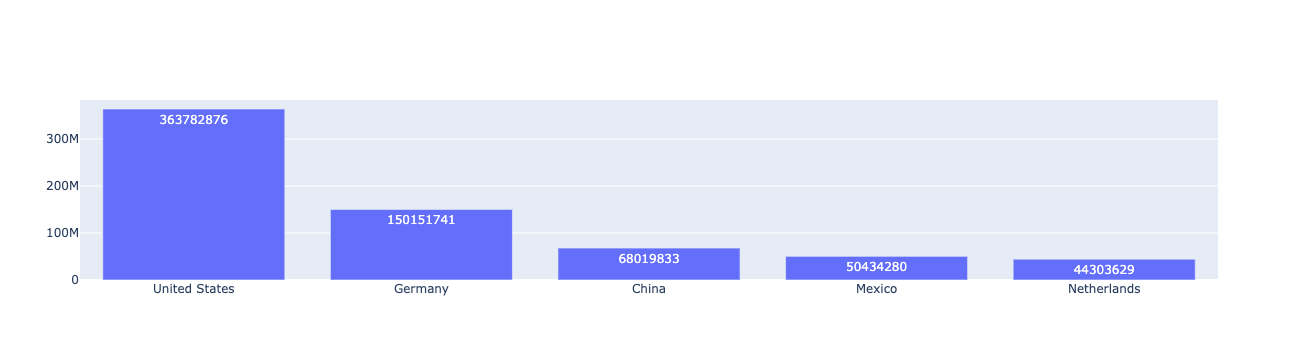

In [25]:
x_import = oat_top5_importers.index[0:5]
y_import = oat_top5_importers['value'][0:5]
# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x_import, y=y_import,
            text=y_import,
            textposition='auto',
        )])

fig.show(renderer='plotly_mimetype')

### Top 5 - Exporters

In [26]:
oat_top5_exporters = dataframe_countries_commodities(countries_list=all_countries_available_list,category='Oats', type='export',year='2020')
# lithium_top5_exporters[0:5]

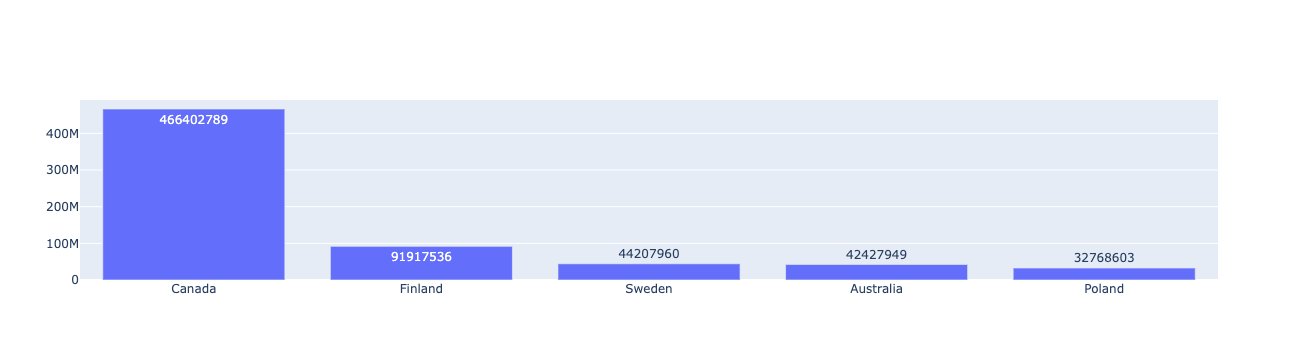

In [27]:
x_export = oat_top5_exporters.index[0:5]
y_export = oat_top5_exporters['value'][0:5]

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x_export, y=y_export,
            text=y_export,
            textposition='auto',
        )])

fig.show(renderer='plotly_mimetype')

In [28]:
oat_top5_exporters_2015 = dataframe_countries_commodities(countries_list=all_countries_available_list,category='Oats', type='export',year='2015')

In [29]:
oat_top5_exporters_2015[0:1]

,value
country1,
Estonia,2341732


#### Canadian and United States Case of the oat
In 2015 the biggest oat exporter was Estonia with an export of 2 million. 

Canadian exports that same year were 219,000. 

After 6 years, canada occupies the first position as the largest export with a value of 466 million.

Canada as the biggest exporter and the United States as the biggest importer show the great relevance of the commodity for the American economy and society. Unlike countries like China that use agricultural material to feed live stocks, oats are known to play an important role in feeding thousands of American homes. Furthermore, the commodity, in recent years, has gained the attention of a nutritionist and has come to be recommended as a fundamental food in a healthy eating routine.



### Oats Prices and YTD % Change

The chart of biggest importers helps us to state that although the numbers are high and this indicates the oats has worldwide circulation, the consumption of Germany, the second biggest importer of oats, represents only 41% of the American consumption, which occupies the first position.
The rise in prices is easily explained by the droughts that hit both the united states and canada.
And reports from the agricultural area of both countries already pointed out that droughts would reduce production, causing a radical increase in prices as a result.

How could the American economy curb the increase in this food product and also avoid a supply crisis? The most intuitive way would be to import from other countries that have some oats to sell. In this case, the countries Finland, Sweden, Australia and Poland may appear as other sources of supply for the American market. But some questions arise: Canada bordering the United States represented a good economy in terms of transport costs. Can the transport cost represent an obstacle to the possibility of containing the price increase with imports from other countries that are overseas? Thinking about the availability of imports from these countries, wouldn't there already be trade agreements established between these countries and their traditional buyers? Would there be oats available in these countries to sell to the United States?


In [ ]:
# tennessee.matos@tradingeconomics.com 